# Titanic 승객 데이터로 의사결정나무 만들기 


## 1. 데이터셋 로딩 
- 데이터셋은 캐글 사이트에서 다운로드 가능 https://www.kaggle.com/c/titanic/data
- train.csv 파일을 titanic.csv 파일로 변환해서 사용 
- 현재 폴더에 data라는 하위 폴더를 만든 뒤 titanic.csv를 저장 

In [3]:
#패키지 불러오기 
import pandas as pd
import numpy as np 
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [4]:
#데이터 프레임으로 데이터 읽어오기 
df = pd.read_csv("data/titanic.csv",index_col=["PassengerId"])
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 변수 설명 
- Survived: 생존여부 
- Pclass: 객실 등급 
- Name: 이름 
- Sex: 성별 
- SibSp: 함께 탑승한 형제자매와 배우자수 
- Parch: 함께 탑승한 부모와 자녀수
- Ticket: 티켓 번호 
- Fare: 운임 
- Cabin: 선실 번호 
- Embarked: 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)

## 2. 데이터 전처리 
- 필요없는 열 제거 
- 변수값 변환 
- 독립변수와 종속변수 구분 

In [5]:
#필요없는 칼럼제거 
df=df.drop(['Name','Ticket','Cabin','Embarked'],axis=1)
#제거확인 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [6]:
#전처리: 진위형 변수로 변형 
df["Sex"] = df.Sex.map({"female":0,"male":1})
#변수 변형 확인 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [7]:
#결속치 확인 
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
#중간값으로 결속치 채워주기 
df.Age.fillna(df.Age.median(),inplace=True)
#중간값으로 채운 결속치 확인 
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [9]:
#input 변수와 Output 변수 구분 
X=np.array(df.iloc[:,1:])
y=np.array(df['Survived'])

In [10]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [11]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## 3.모델적합 / 변수 중요도

In [13]:
#트레이닝 세트와 테스트 세트로 데이터 구분 (여기서는 7:3으로 구분해준다)
from sklearn.model_selection import train_test_split

#randomstate는 반복적으로 같은 결과를 만들어 내기 위하여 설정해준다 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

tree = DecisionTreeClassifier(max_depth = 3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
#각 변수에 대한 중요도 값이 array로 반환이 된다
tree.feature_importances_

array([0.17568873, 0.61552198, 0.06794334, 0.08767138, 0.        ,
       0.05317456])

In [15]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5
feature_importance,0.175689,0.615522,0.067943,0.087671,0.0,0.053175


In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), columns = df.columns[1:],
             index=['feature_importance'])
#성별이 압도적으로 중요하고 다음은 객실정보가 가장 중요하다 부모 자녀의 영향도는 거의 없다

,Pclass,Sex,Age,SibSp,Parch,Fare
feature_importance,0.175689,0.615522,0.067943,0.087671,0.0,0.053175


In [18]:
#의사결정나무 모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0,max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## 4. 모델 성능 평가

In [19]:
temp_y_pred = tree.predict(X_test)
#Training 값을 X_test에서 넣음 
print('예측값\n',temp_y_pred)
print('실제값\n',y_test)

예측값
 [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [20]:
#정확도 계산 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

temp_acc = accuracy_score(y_test,temp_y_pred)

#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_Acc로 추출함 
print('정확도:',format(temp_acc))

정확도: 0.8208955223880597


In [21]:
#오차행렬 (confusion matrix)
print(confusion_matrix(y_test,temp_y_pred))

[[146  22]
 [ 26  74]]


In [22]:
#모델 성능 
print(classification_report((tree.predict(X_test)> 0.5).astype("int16"),y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       172
           1       0.74      0.77      0.76        96

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [23]:
train_scores, test_scores = list(),list ()
#Train_scroe와 test_score의 정확도를 저장할 장소 
#Train_score는 훈련데이터에 특화될수록 증가 
#Test_score는 테스트데이터에 일반화될수록 증가 

In [24]:
#의사결정 나무 모델의 depth 조절 (1에서 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier (max_depth =i)
    #깊이를 증가시키면서 의사결정나무 모델 적합 
    DT1.fit(X_train,y_train)
    
    #training dataset 정확도 평가 
    train_att = DT1.predict(X_train)
    train_acc=accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가 
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f,test:%3f'%(i,train_acc,test_acc))

>1, train: 0.787,test:0.787313
>2, train: 0.791,test:0.787313
>3, train: 0.836,test:0.820896
>4, train: 0.844,test:0.820896
>5, train: 0.859,test:0.813433
>6, train: 0.872,test:0.794776
>7, train: 0.881,test:0.802239
>8, train: 0.905,test:0.805970
>9, train: 0.925,test:0.805970
>10, train: 0.939,test:0.802239
>11, train: 0.960,test:0.794776
>12, train: 0.968,test:0.817164
>13, train: 0.971,test:0.791045
>14, train: 0.976,test:0.820896
>15, train: 0.978,test:0.809701
>16, train: 0.978,test:0.805970
>17, train: 0.979,test:0.787313
>18, train: 0.979,test:0.798507
>19, train: 0.979,test:0.802239


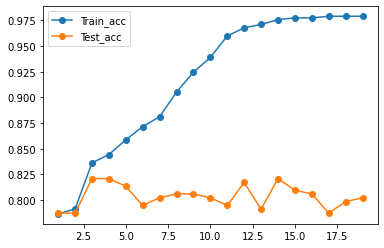

In [25]:
from matplotlib import pyplot
pyplot.plot(range(1,20),train_scores,'-o',label="Train_acc")
pyplot.plot(range(1,20),test_scores,'-o',label="Test_acc")
pyplot.legend()
pyplot.show()

#최적의 의사결정나무 싶이는 3


## 트리시각화

In [44]:
#트리시각화를 위한 라이브러리 설치 
!pip install pydotplus 
!pip install graphviz

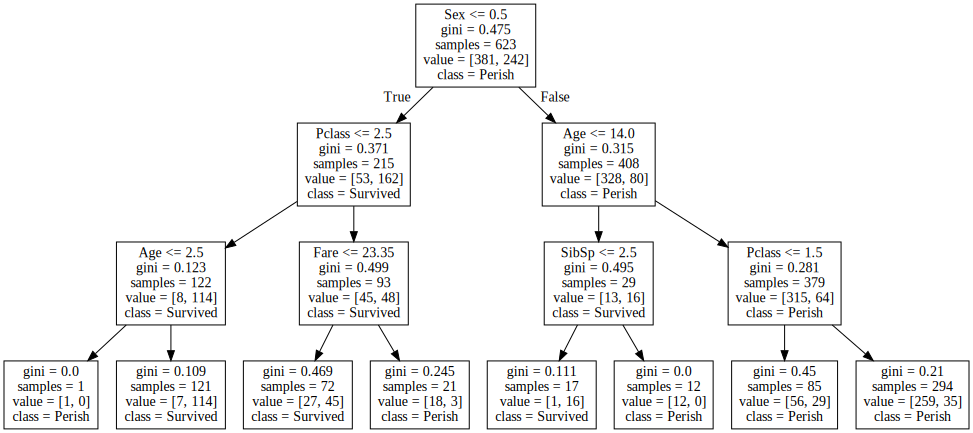

In [27]:
#트리시각화

import graphviz 
from sklearn.tree import export_graphviz

feature_name=['Pclass','Sex','Age','SibSp','Parch','Fare']
tree = export_graphviz(tree,feature_names=feature_name,
                       class_names = ["Perish","Survived"])

graphviz.Source(tree)

## 과적합과 가지치기
### 60191107 마성현 
- 의사결정 나무의 깊이별 정확도 비교와 최적의 의사결정나무 깊이 구하기 

In [33]:
train_scores, test_scores = list(),list ()
#Train_scroe와 test_score의 정확도를 저장할 장소 
#Train_score는 훈련데이터에 특화될수록 증가 
#Test_score는 테스트데이터에 일반화될수록 증가 

In [34]:
#의사결정 나무 모델의 depth 조절 (1에서 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier (max_depth =i)
    #깊이를 증가시키면서 의사결정나무 모델 적합 
    DT1.fit(X_train,y_train)
    
    #training dataset 정확도 평가 
    train_att = DT1.predict(X_train)
    train_acc=accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가 
    test_att = tree.predict(X_test)
    test_acc = accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f,test:%3f'%(i,train_acc,test_acc))
    

>1, train: 0.699,test:0.737500
>2, train: 0.699,test:0.737500
>3, train: 0.752,test:0.737500
>4, train: 0.767,test:0.737500
>5, train: 0.804,test:0.737500
>6, train: 0.849,test:0.737500
>7, train: 0.886,test:0.737500
>8, train: 0.916,test:0.737500
>9, train: 0.944,test:0.737500
>10, train: 0.970,test:0.737500
>11, train: 0.984,test:0.737500
>12, train: 0.993,test:0.737500
>13, train: 0.996,test:0.737500
>14, train: 0.998,test:0.737500
>15, train: 1.000,test:0.737500
>16, train: 1.000,test:0.737500
>17, train: 1.000,test:0.737500
>18, train: 1.000,test:0.737500
>19, train: 1.000,test:0.737500


In [ ]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for pytz sip appdirs bleach html5lib prompt_toolkit qdarksty- 